In [5]:
pip3 install pandas

SyntaxError: invalid syntax (Temp/ipykernel_24260/3029356636.py, line 1)

In [65]:
import pandas as pd 
import pymysql 
import pymysql.cursors
import numpy as np
from scipy.stats import chisquare
from scipy import stats
import scipy as sp
import statsmodels.api as sm
from statsmodels.formula.api import ols, logit, glm
import seaborn as sns
import numpy as np
 
ssh_host = '3.36.21.112'
ssh_port = '21'
conn_practice = pymysql.connect(host='3.36.21.112', user='root', password='ckUdC17yqltr', db='practice')
conn_resource = pymysql.connect(host='3.36.21.112', user='root', password='ckUdC17yqltr', db='resource')
conn_testserver = pymysql.connect(host='3.36.21.112', user='root', password='ckUdC17yqltr', db='saladpet')
## 2. 엑셀 전처리 시 필요한 SQL DB 불러오기 작업 ##

cursor_practice = conn_practice.cursor()
cursor_resource = conn_resource.cursor() #dictionary 형태로 결과 반환 원해 -> pymysql.cursors.Dictcursor을 ()에 넣어줌.
cursor_testserver = conn_testserver.cursor()


sql_data_phos3 = "select * from practice.data_phos3"
sql_data_phos2 = "select * from practice.data_phos2"
sql_data_phos = "select * from practice.data_phos"

data_phos = pd.read_sql(sql_data_phos, conn_practice)
data_phos2 = pd.read_sql(sql_data_phos2, conn_practice)
data_phos3 = pd.read_sql(sql_data_phos3, conn_practice)

 # 열이 포함된 형태로 select하려면 이 문자형태로 진행 

data_phos3
    
    
#supplement_type.set_index("type_id", inplace = True ) # inplace = true는 변경 사항을 그대로 객체에 다시 저장한다.
#map_product_cate.set_index("mc_pk", inplace = True) 

#dictionary_function_name.to_excel('C:/import/dictionary_function_name.xlsx', sheet_name = 'dictionary_function_name.xlsx')

ValueError: Invalid format specifier

ValueError: Invalid format specifier

In [64]:
# 가격/칼로리와 1)칼슘 : 인 & 2)에너지 기준 인 함량

#model4 = smf.ols(formula='price_per_kcal~p', data=data_phos3).fit()
#model4.summary()

import statsmodels.api as sm

x = round(data_phos3['price_per_kcal'],3)
y = data_phos3['cap_range']
logit = sm.Logit(y,x).fit()
logit.summary()

ValueError: endog must be in the unit interval.

<AxesSubplot:xlabel='p_ox', ylabel='count'>

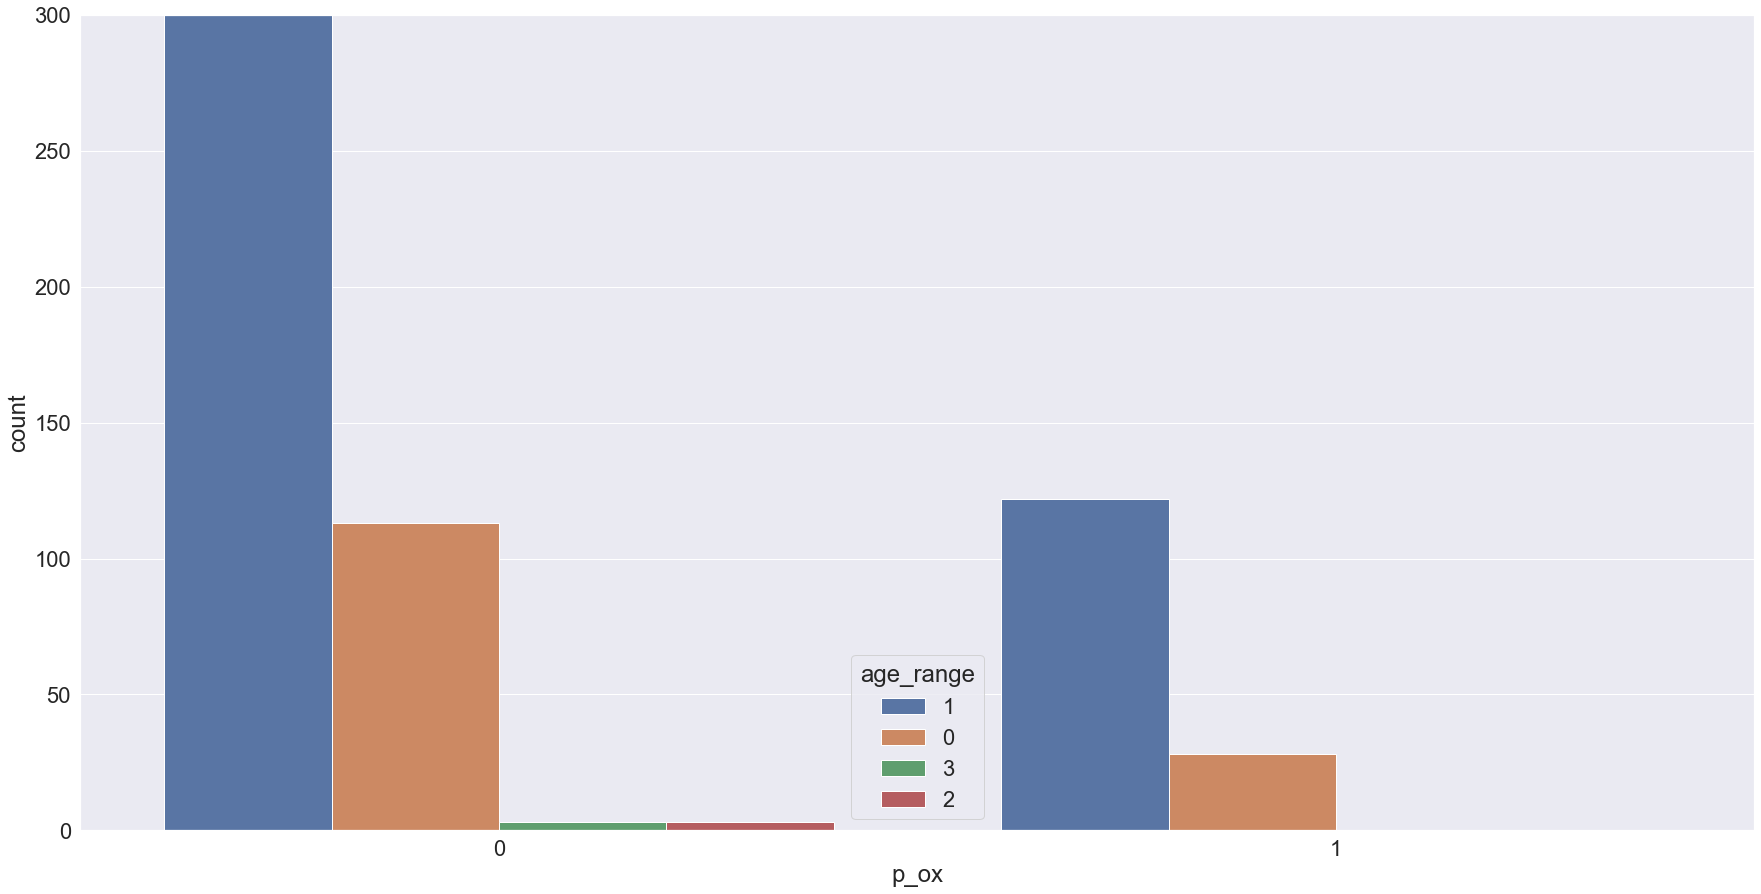

In [45]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,15)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 
sns.set(font_scale = 2)
plt.xlim(0,5)
plt.ylim(0,300)

sns.countplot(data= data_phos, x='p_ox', hue = 'age_range')

In [50]:
stats.ttest_ind(mean1, mean2, equal_var = True)

Ttest_indResult(statistic=-0.04479841016932448, pvalue=0.9642753718766581)

In [14]:
# 인 과 관련있는 데이터 뽑아보기

import statsmodels.formula.api as smf
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
model = smf.ols(formula = 'p_energy~crud_ash_energy+crud_fat_energy+crud_fiber_energy+crud_protein_energy+ca_energy', data = data_phos2).fit()
model.summary()


NameError: name 'data_phos' is not defined

<AxesSubplot:xlabel='p_ox', ylabel='count'>

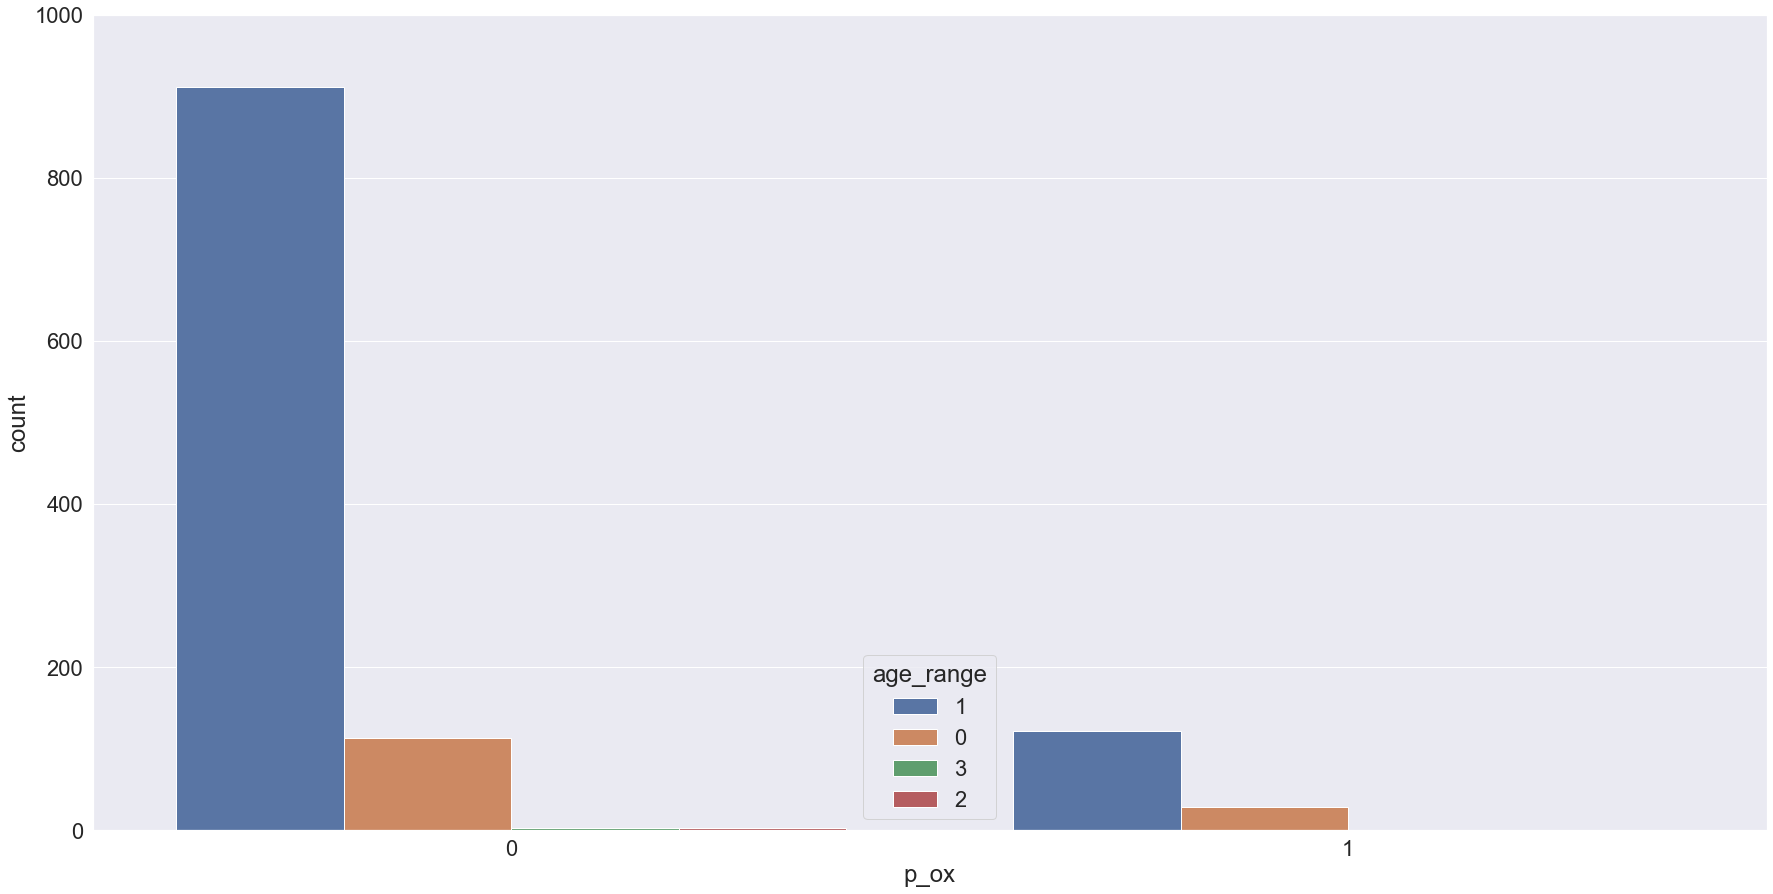

In [38]:
# 전체에 대한 에너지기준 인 함량
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,15)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 
sns.set(font_scale = 2)
plt.xlim(0,5)
plt.ylim(0,1000)
#sns.histplot(data = data_phos, x = 'p_energy', color = 'green')
#sns.boxplot(data=penguins, x='flipper_length_mm', y='species', hue='sex')

# 전체 대한 칼슘인 비율 (연속)

#sns.histplot(data = data_phos, x = 'cap_ratio', color = 'green')
#sns.violinplot(data=data_phos, x='cap_ratio', color = 'red')

sns.countplot(data = data_phos, x = 'p_ox', hue = 'age_range')


In [32]:
# 급여연령 따른 인
#일원배치분산분석
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chisquare
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols, logit, glm


young = data_phos2[data_phos2['age_range']== 0].p_energy.values
old = data_phos2[data_phos2['age_range']== 1].p_energy.values
sp.stats.levene(young, old)
stats.ttest_ind(young, old, equal_var = False)


# 회귀분석(더미변수를 활용한)
#age_range가 노령이 1인거 age_range_1 이 젊은게 1인거
phos1 = pd.get_dummies(data_phos2['age_range'],prefix='age_range',drop_first = True)
phos2 = pd.concat([data_phos2, phos1], axis = 1)
phos2['age_range_1'][phos2['age_range_1']==0] = 2
phos2['age_range_1'][phos2['age_range_1']==1] = 0
phos2['age_range_1'][phos2['age_range_1']==2] = 1
phos2
model2 = smf.ols(formula='p_energy~age_range_1', data = phos2).fit()
model2.summary()

<ipython-input-32-d67aa9aa6c1e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phos2['age_range_1'][phos2['age_range_1']==0] = 2
<ipython-input-32-d67aa9aa6c1e>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phos2['age_range_1'][phos2['age_range_1']==1] = 0
<ipython-input-32-d67aa9aa6c1e>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phos2['age_range_1'][phos2['age_range_1']==2] = 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               p_energy   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.240
Date:                Sat, 14 Aug 2021   Prob (F-statistic):              0.135
Time:                        15:35:01   Log-Likelihood:                -2234.4
No. Observations:                 971   AIC:                             4473.
Df Residuals:                     969   BIC:                             4483.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.4821      0.083     29.901      0.000       2.319       2.645
age_range_1    -0.3505      0.234     -1.497      0.135      -0.810       0.109
==============================================================================
Omnibus:                     1323.897   Durbin-Watson:                   1.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           212814.672
Skew:                           7.517   Prob(JB):                         0.00
Kurtosis:                      73.951   Cond. No.                         3.07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

NameError: name 'data_phos' is not defined

<AxesSubplot:xlabel='price_per_kcal', ylabel='result'>

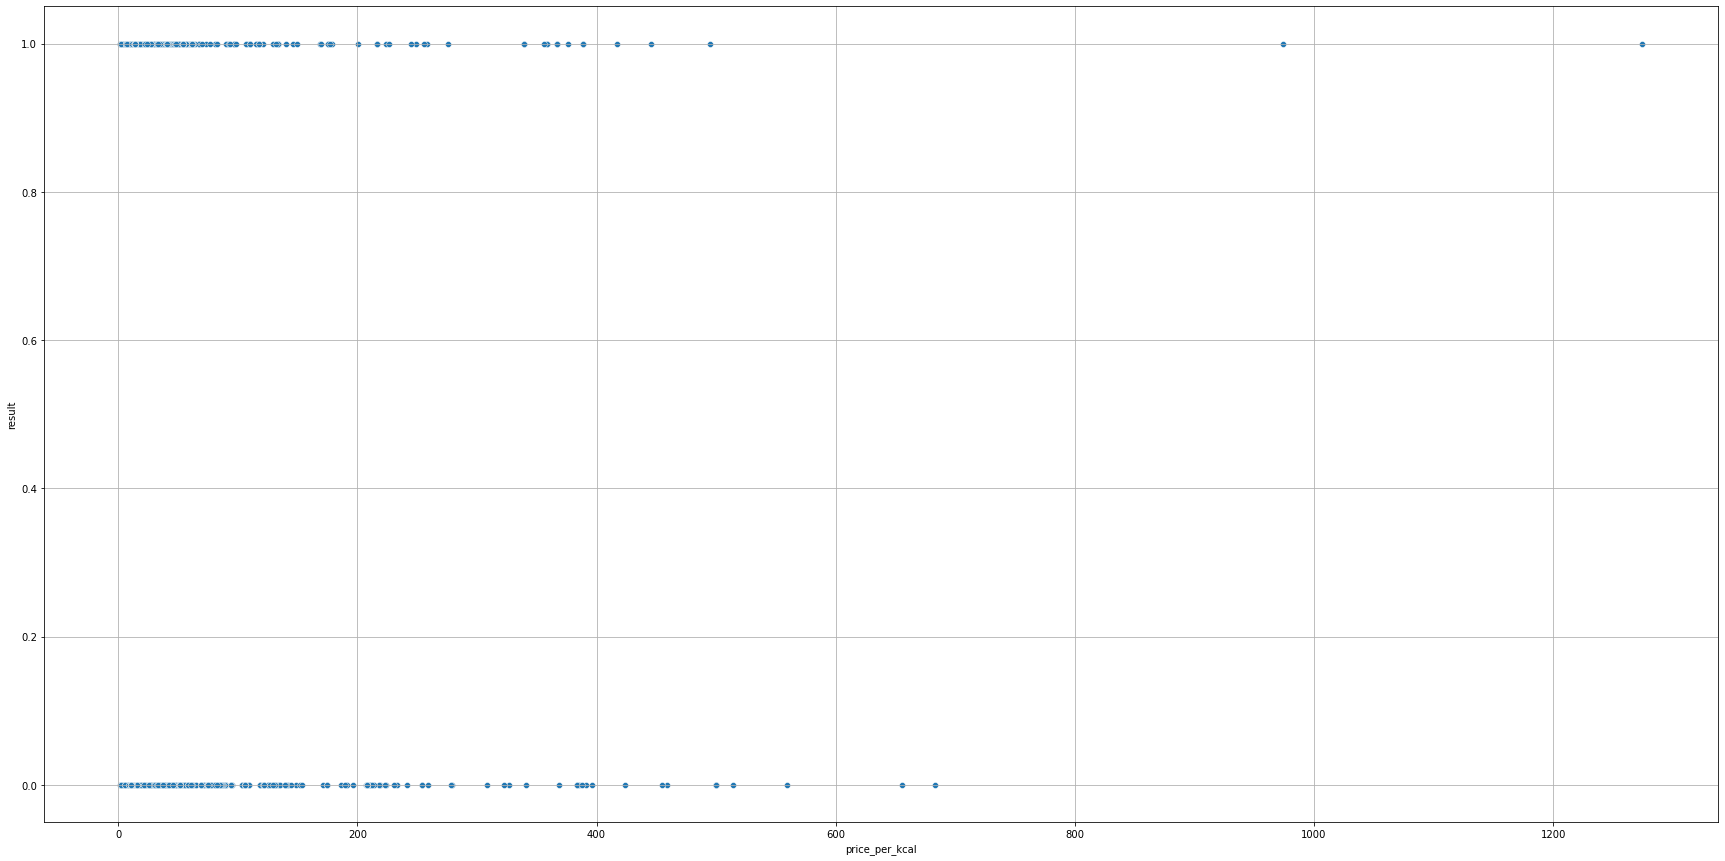

In [54]:

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,15)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

sns.scatterplot(data = data_capp, x='price_per_kcal', y='result')
